# Loading the Packages

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

# Loading The Dataset

In [10]:
df = pd.read_csv('churn_prediction.csv')

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# Understanding Data

In [4]:
df.shape

(28382, 21)

In [5]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [6]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [8]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


# Preprocessing

# Missing Values

Look for the missing values in the dataset if any and treat the missing values before fitting a logistic model on the dataset

In [9]:
pd.isna(df).sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

The result of this function shows that there are quite a few missing values in columns gender, dependents, city, days since last transaction. I will go through each of them 1 by 1 to find the appropriate missing value imputation strategy for each of them.

# Gender

the categories in gender are

In [10]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

So there is a good mix of males and females and arguably missing values cannot be filled with any one of them. I could create a seperate category by assigning the value -1 for all missing values in this column.

Before that, first I will convert the gender into 0/1 and then replace missing values with -1

In [11]:
#Convert Gender 
dict_gender = {'Male': 1, 'Female': 0}
df.replace({'gender': dict_gender}, inplace = True)

df['gender'] = df['gender'].fillna(-1)

# Dependents, occupation and city with mode

Next I will have a look at the dependents & occupations column and impute with mode as this is sort of an ordinal variable.
Similarly City can also be imputed with most common category 1020

In [12]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [13]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [14]:
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: city, Length: 1604, dtype: int64

In [15]:
df['dependents'] = df['dependents'].fillna(0)
df['occupation'] = df['occupation'].fillna('self_employed')
df['city'] = df['city'].fillna(1020)

# Days since last transaction

A fair assumption can be made on this column as this is number of days since last transaction in 1 year, we can substitute missing values with a value greater than 1 year say 999, to show that the customer has not done any transaction for over a year

In [16]:
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna(999)

Before applying linear model such as logistic regression, we need to scale the data and keep all features as numeric strictly.

# Dummies with Multiple Categories

In [17]:
#Convert occupation to one hot encoded features
df = pd.concat([df, pd.get_dummies(df['occupation'], prefix = str('occupation'), prefix_sep = '_')], axis = 1)

In [18]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


# Exploratory Data Analysis

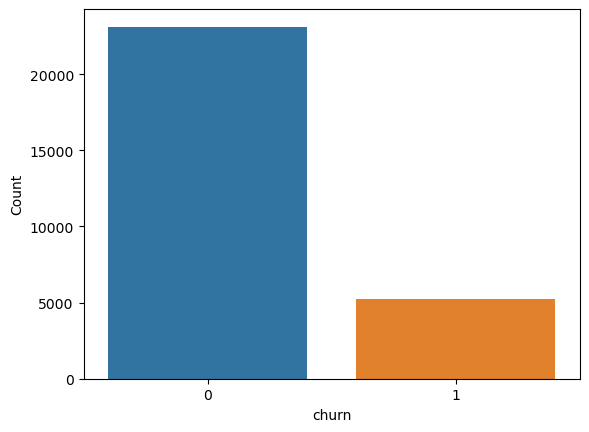

In [19]:

sns.countplot(x=df["churn"])
plt.xlabel('churn')
plt.ylabel('Count')
plt.show()

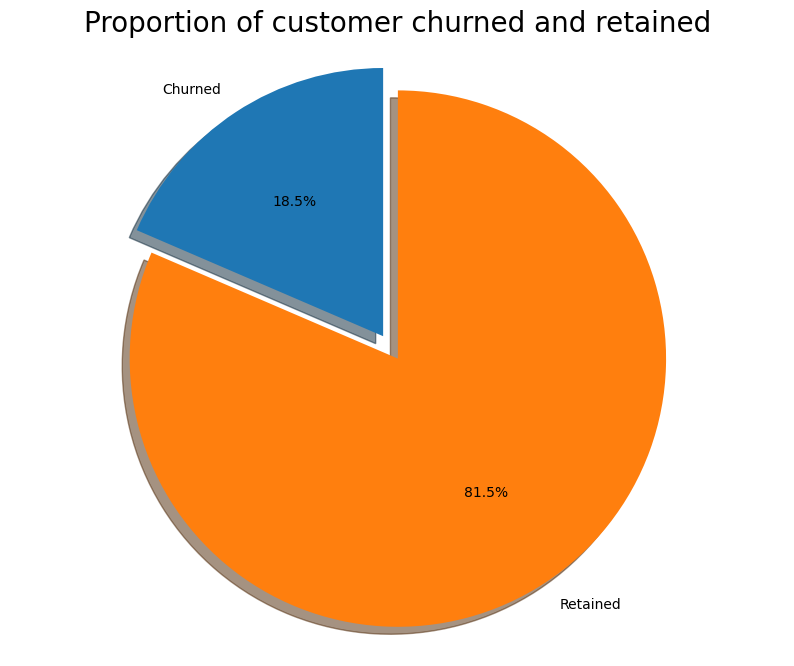

In [20]:
labels = 'Churned', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# Checking the distribution of each feature:

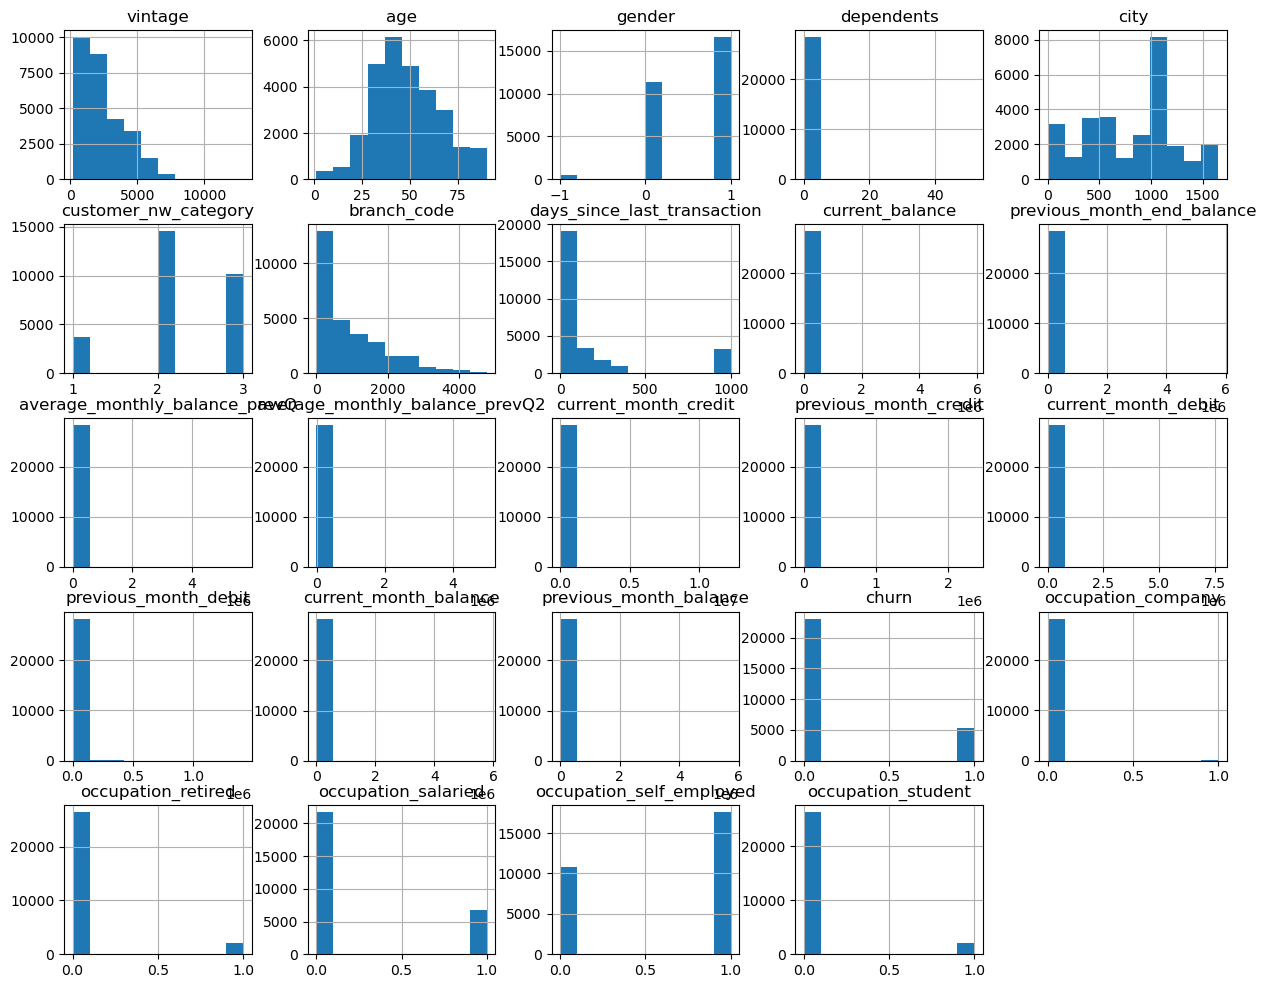

In [21]:
df = df.drop(['customer_id'], axis = 1)
df.hist(figsize=(15,12))
plt.title('Features Distribution')
plt.show()

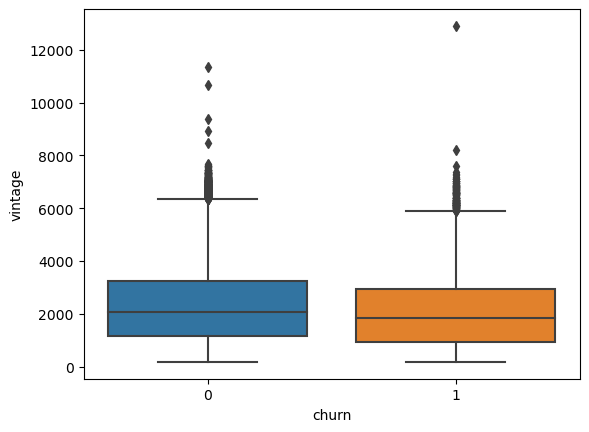

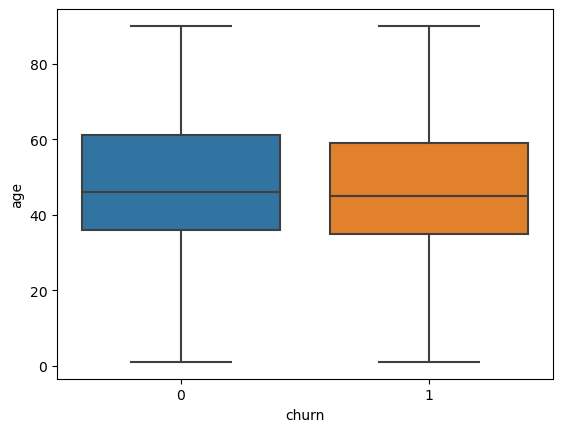

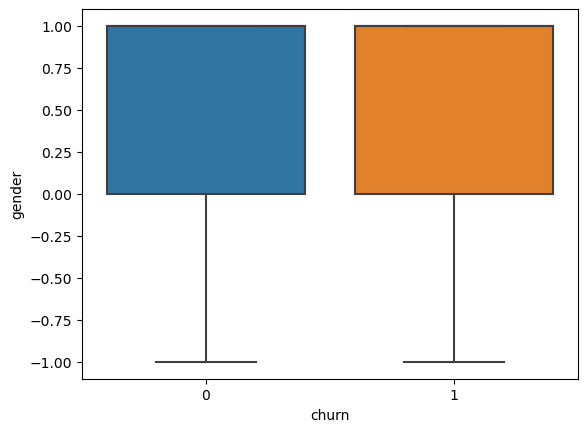

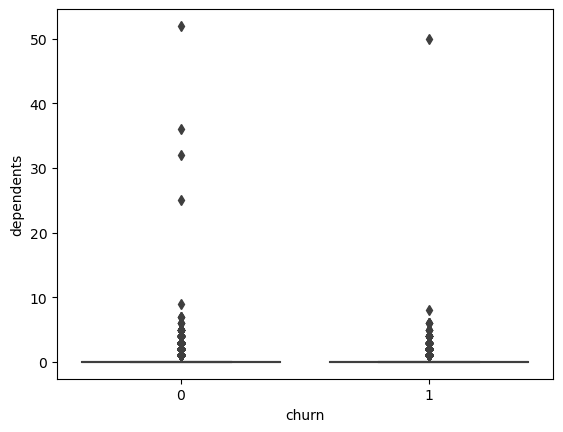

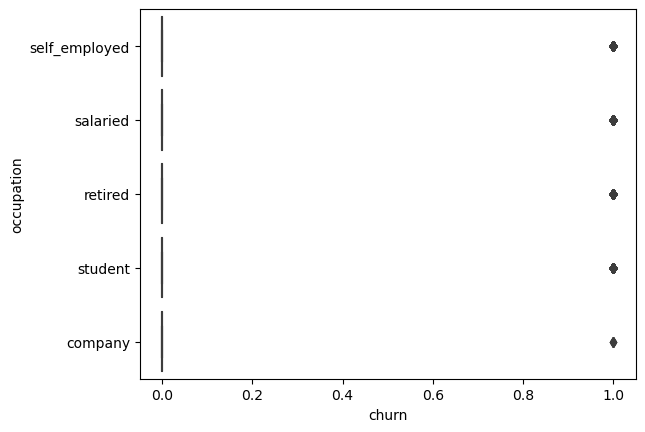

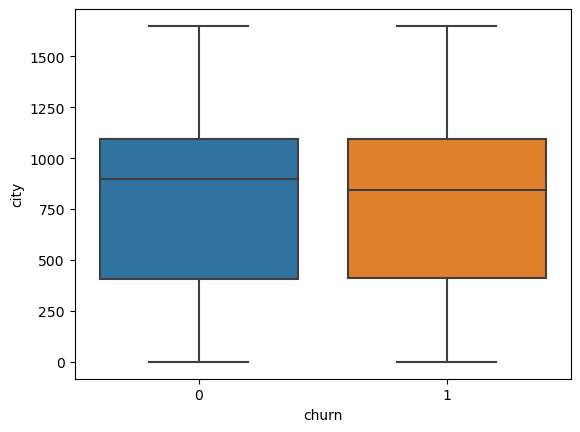

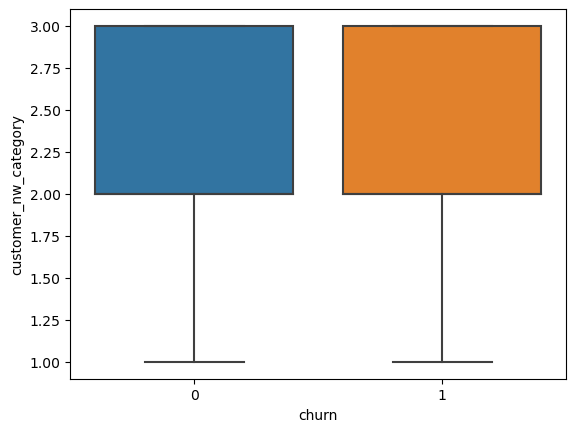

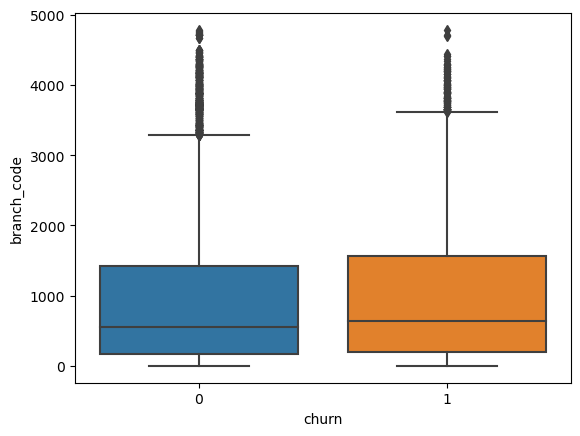

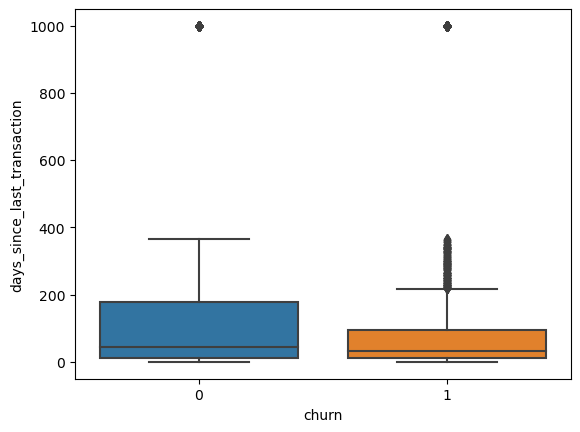

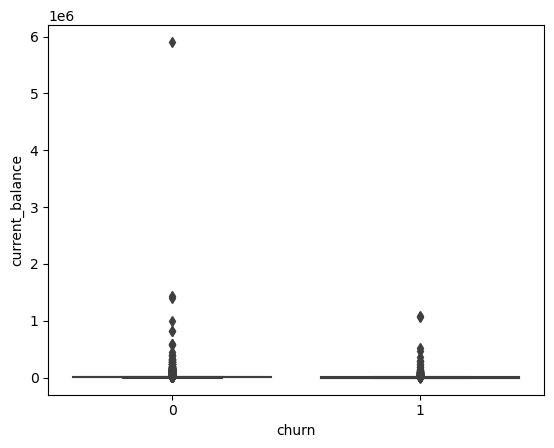

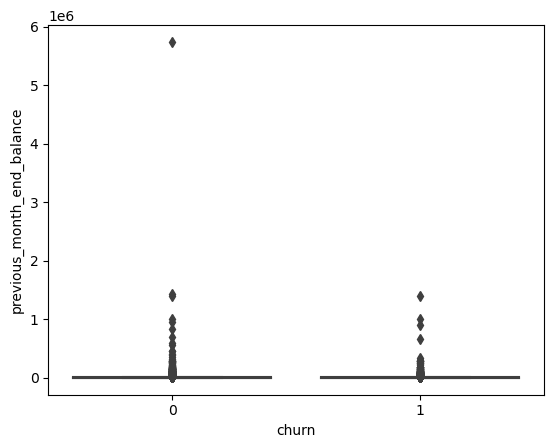

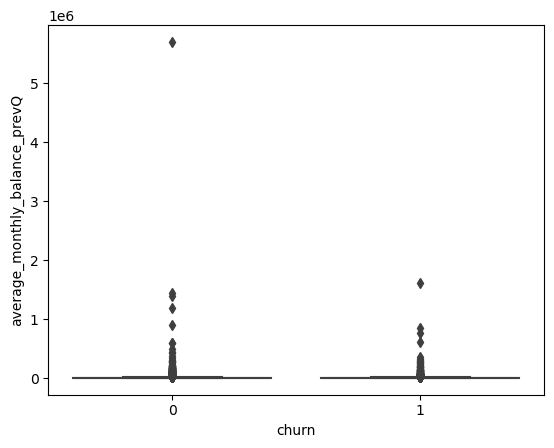

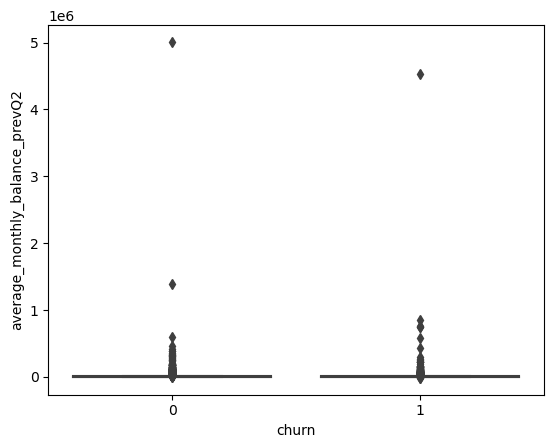

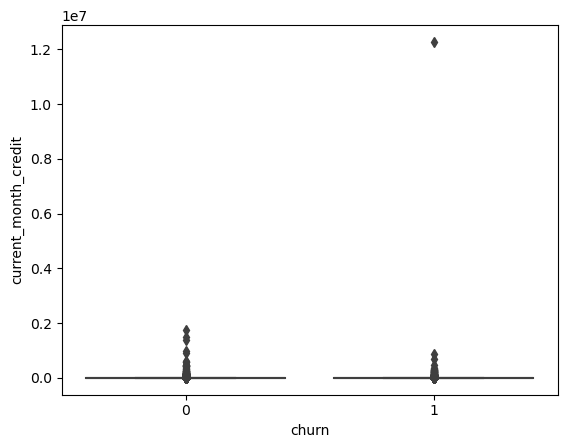

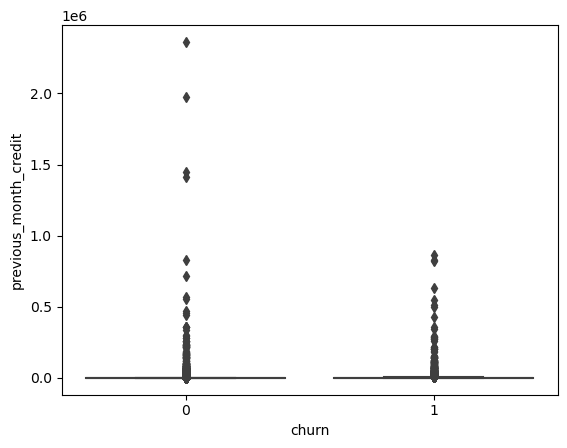

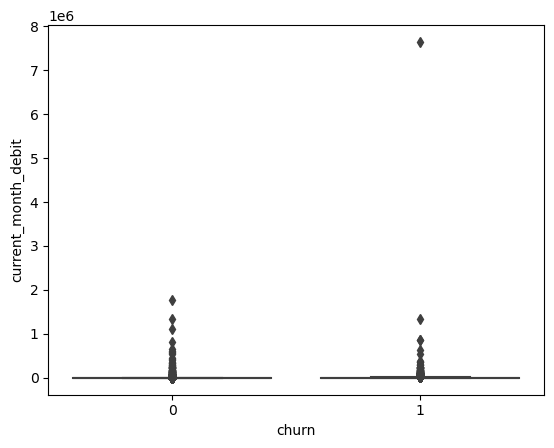

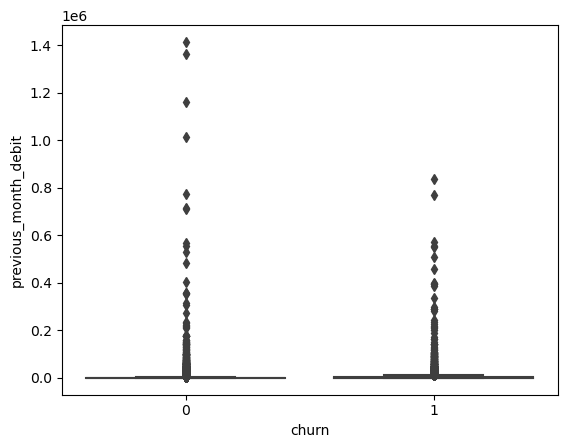

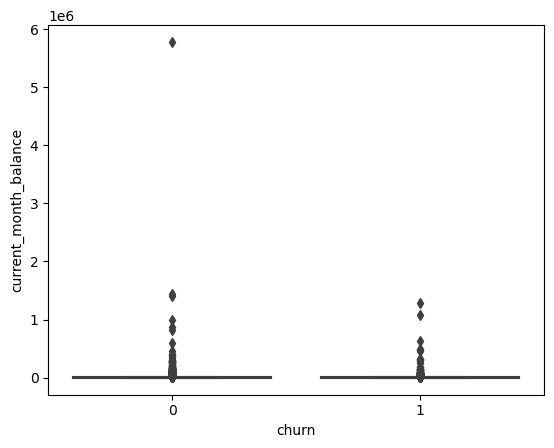

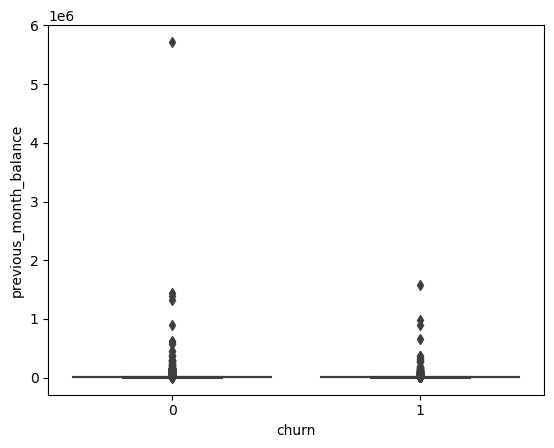

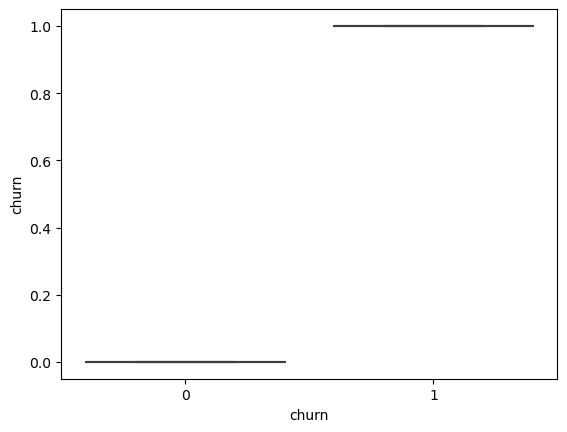

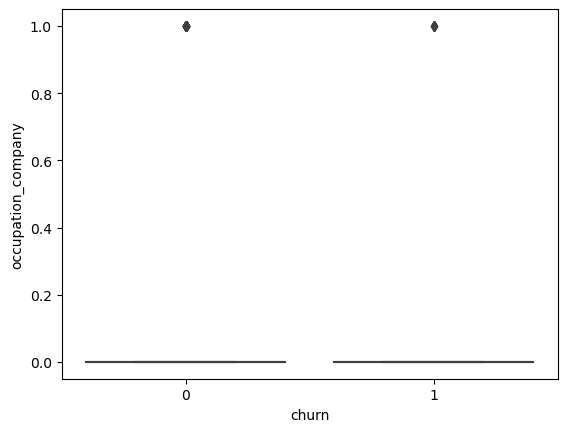

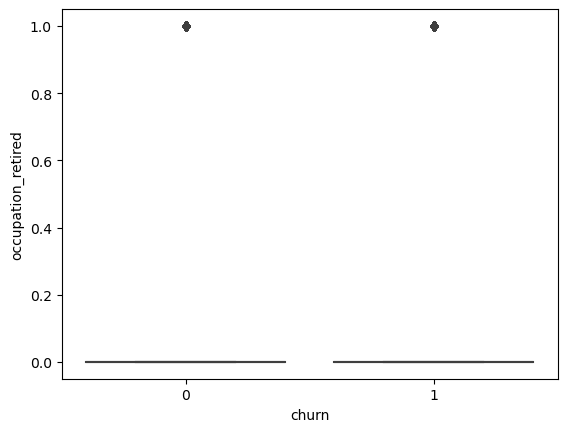

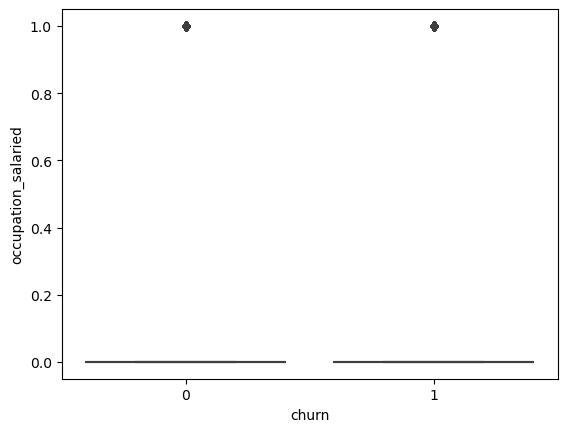

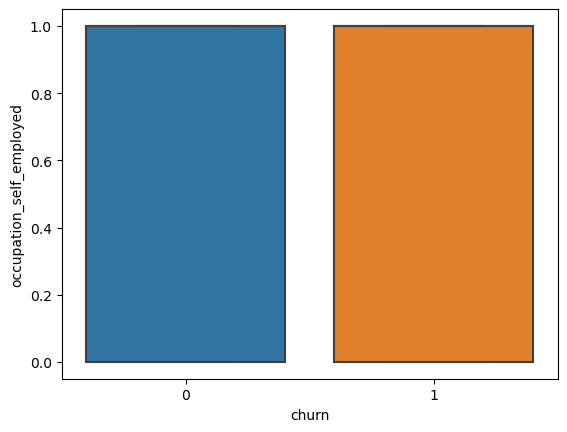

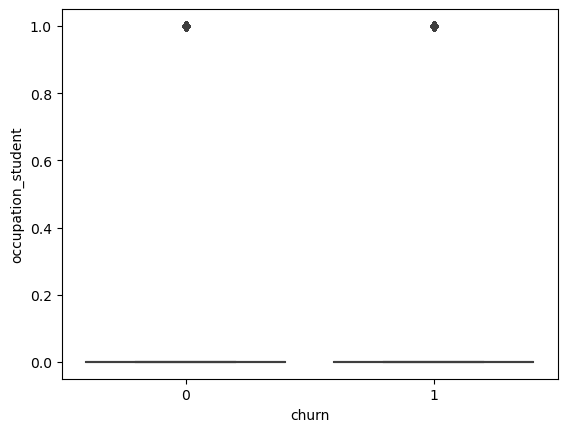

In [22]:
for i in range(0, len(df.columns)):
    sns.boxplot(x=df['churn'],y=df.iloc[:,i])
    colname=df.columns[i]
    plt.ylabel(colname)
    plt.xlabel('churn')
    plt.show()
    
    

In [11]:
correlations = df.corr()
print(correlations)

                                customer_id   vintage       age  dependents  \
customer_id                        1.000000 -0.006093 -0.000442   -0.008616   
vintage                           -0.006093  1.000000  0.227390    0.036987   
age                               -0.000442  0.227390  1.000000   -0.000612   
dependents                        -0.008616  0.036987 -0.000612    1.000000   
city                               0.000743  0.044200  0.015439    0.001892   
customer_nw_category               0.009618 -0.167366 -0.076532    0.013134   
branch_code                       -0.000286 -0.380714 -0.058990    0.020141   
days_since_last_transaction        0.010267 -0.088744 -0.016679   -0.079834   
current_balance                    0.006589  0.002986  0.054346   -0.003070   
previous_month_end_balance         0.005819  0.004518  0.058342    0.000216   
average_monthly_balance_prevQ      0.004485  0.003433  0.061708    0.001213   
average_monthly_balance_prevQ2    -0.002532  0.00224

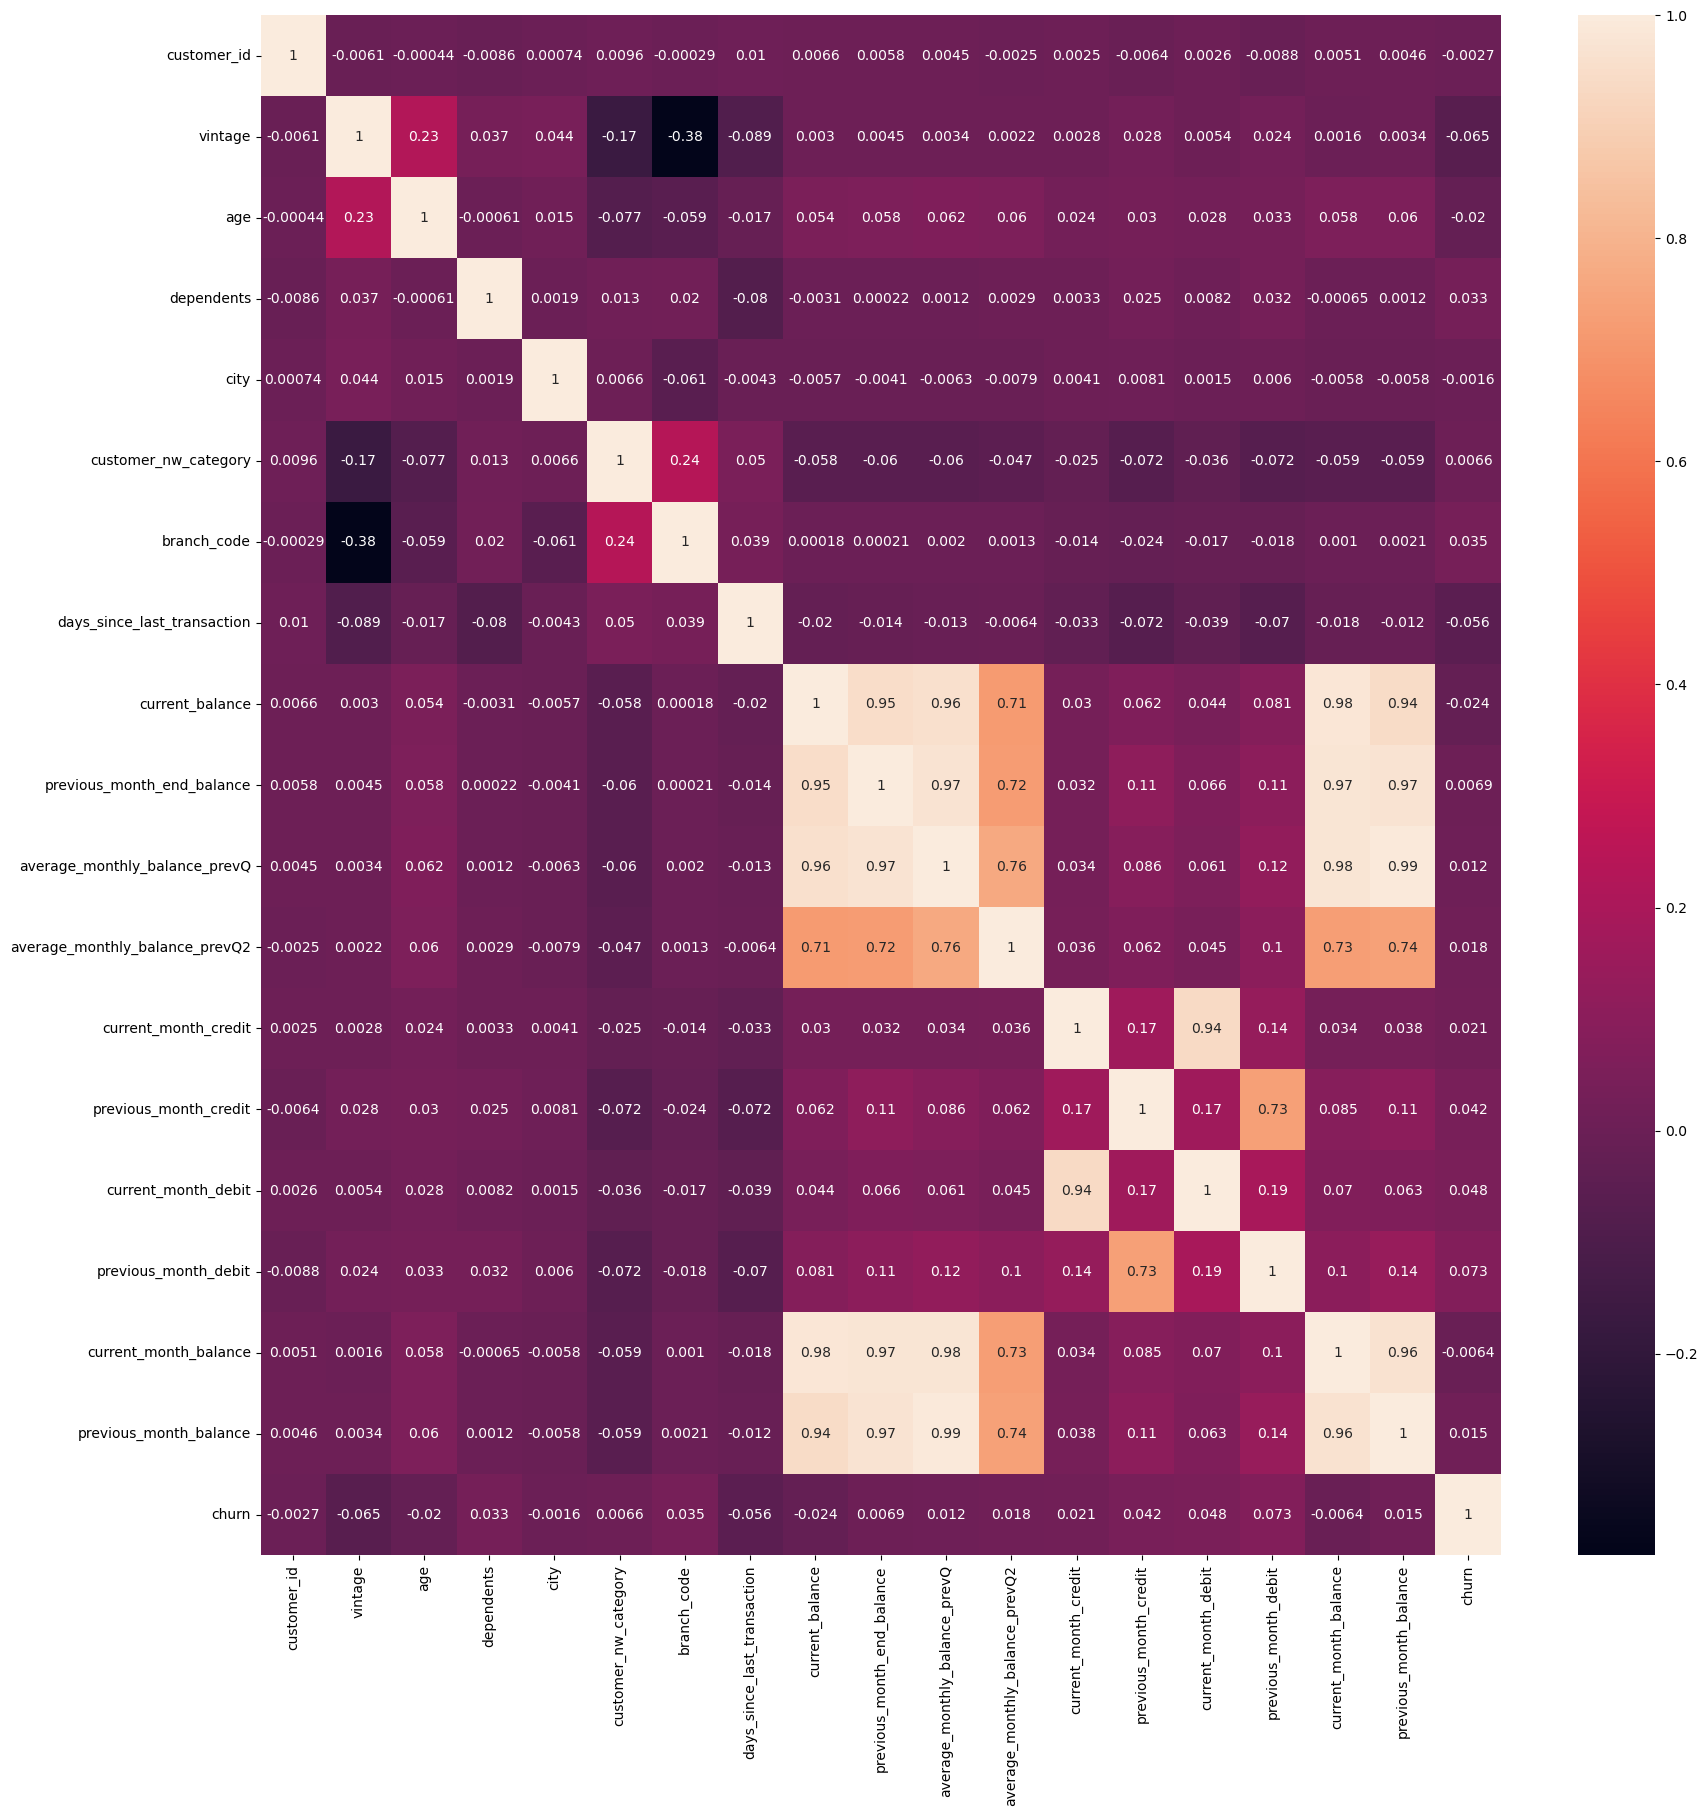

In [12]:
%matplotlib inline
plt.figure(figsize = (20, 20))
sns.heatmap(correlations,annot = True)
plt.show()

# Scaling Numerical Features for Logistic Regression

There are a lot of outliers in the dataset especially when it comes to previous and current balance features. Also, the distributions are skewed for these features. I will take 2 steps to deal with that here:

Log Transformation

Standard Scaler

Standard scaling is anyways a necessity when it comes to linear models and I will do that here after doing log transformation on all balance features.

In [25]:
num_cols = ['customer_nw_category', 'current_balance',
           'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
           'current_month_credit', 'previous_month_credit', 'current_month_debit',
           'previous_month_debit', 'current_month_balance', 'previous_month_balance']

for i in num_cols:
    df[i] = np.log(df[i] + 17000)
    
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns = num_cols)

In [26]:
df_df_og = df.copy()
df = df.drop(columns = num_cols, axis = 1)
df = df.merge(scaled, left_index = True, right_index = True, how = "left")


In [27]:
y_all = df.churn
df = df.drop(['churn', 'occupation'], axis = 1)

# Distribution after scaling

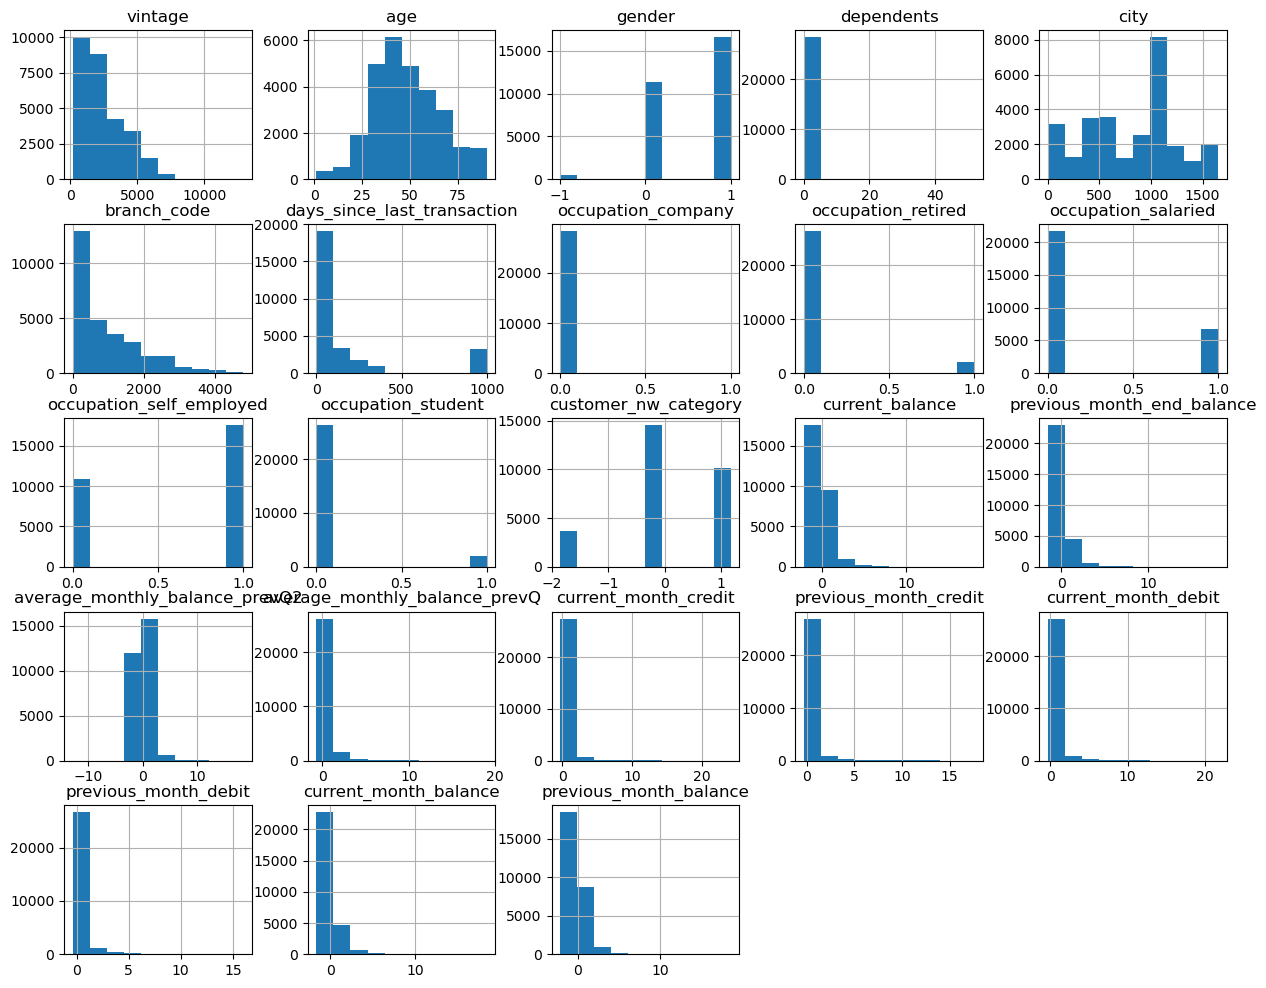

In [28]:
df.hist(figsize=(15,12))
plt.title('Features Distribution')
plt.show()

# Model Building and Evaluation Metrics


Since this is a binary classification problem, we could use the following 2 popular metrics:

1. Recall

2. Area under the Receiver operating characteristic curve

Now, we are looking at the recall value here because a customer falsely marked as churn would not be as bad as a customer who was not detected as a churning customer and appropriate measures were not taken by the bank to stop him/her from churning

The ROC AUC is the area under the curve when plotting the (normalized) true positive rate (x-axis) and the false positive rate (y-axis).

Our main metric here would be Recall values, while AUC ROC Score would take care of how well predicted probabilites are able to differentiate between the 2 classes.

# Conclusions from EDA

a) For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature

b) For all the balance features the lower values have much higher proportion of churning customers

c) For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable

d) We see significant difference for different occupations and certainly would be interesting to use as a feature for prediction of churn.

Now, we will first split our dataset into test and train and using the above conclusions select columns and build a baseline logistic regression model to check the ROC-AUC Score & the confusion matrix

# Building the Model

# Baseline Columns

In [29]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [30]:
df_baseline = df[baseline_cols]

# Train Test Split to create a validation set

In [31]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [32]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1] # bcz i used _proba i am going to get a probability

In [55]:
#w=model.coef_
#w

In [56]:
#df_baseline.columns

# AUC ROC Curve & Confusion Matrix

Now, let us quickly look at the AUC-ROC curve for our logistic regression model and also the confusion matrix to see where the logistic regression model is failing here.

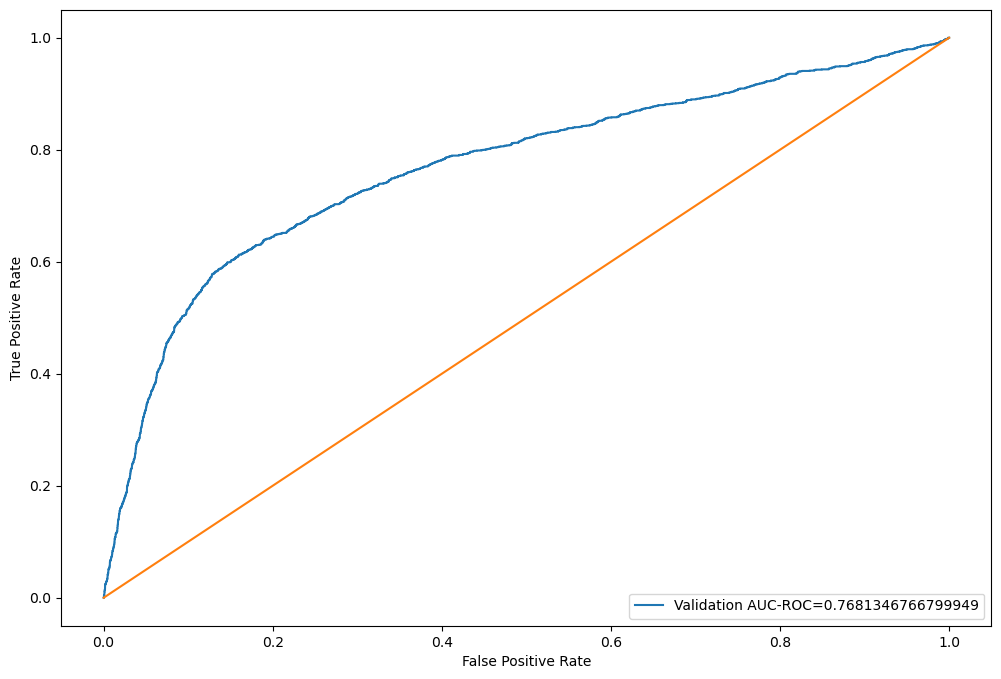

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

# Confusion Matrix

In [34]:
# Confusion Matrix
pred_val = model.predict(xtest)

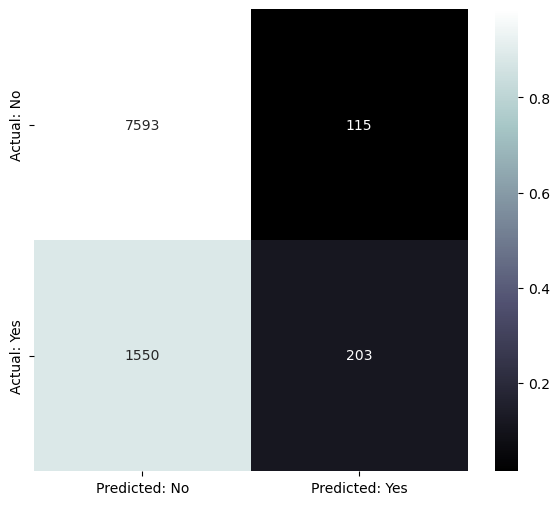

In [35]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [36]:
# Recall Score
recall_score(ytest,pred_val)

0.11580148317170565

# Cross validation

Cross Validation is one of the most important concepts in any type of data modelling. It simply says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.


We divide the entire population into k equal samples. Now we train models on k-1 samples and validate on 1 sample. Then, at the second iteration we train the model with a different sample held as validation.


In k iterations, we have basically built model on each sample and held each of them as validation. This is a way to reduce the selection bias and reduce the variance in prediction power.


Since it builds several models on different subsets of the dataset, we can be more sure of our model performance if we use CV for testing our models.

Now let us try using all columns available to check if we get significant improvement.

There is some improvement in both ROC AUC Scores and Precision/Recall Scores. Now we can try backward selection to select the best subset of features which give the best score.

# Reverse Feature Elimination or Backward Selection

We have already built a model using all the features and a separate model using some baseline features. We can try using backward feature elimination to check if we can do better. Let's do that next.

The balance features are proving to be very important as can be seen from the table. The RFE function can also be used to select features. Lets select the top 10 features from this table and check score.

Wow, the top 10 features obtained using the reverse feature selection are giving a much better score than any of our earlier attempts. This is the power of feature selection and it especially works well in case of linear models as tree based models are in itself to some extent capable of doing feature selection.

The recall score here is quite low. We should play around with the threshold to get a better recall score. AUC ROC depends on the predicted probabilities and is not impacted by the threshold. Let us try 0.2 as threshold which is close to the overall churn rate

We observe that there is continuous improvement in the Recall Score. However, clearly precision score is going down. On the basis of business requirement the bank can take a call on deciding the threshold. Without knowing the metrics relevant to the business, our best course of action is to optimize for AUC ROC Score so as to find the best probabilites here.

# Comparison of Different model fold wise

Let us visualise the cross validation scores for each fold for the following 3 models and observe differences:

a)Baseline Model

b)Model based on all features

c)Model based on top 10 features obtained from RFE

Here, we can see that the model based on RFE is giving the best result for each fold and students are encouraged to try more feature selection techniques and fine tune to get the best results.

In [37]:
import pickle

In [38]:
#saving the model
filename = 'customer_churn_prediction.pkl'
pickle.dump(model, open(filename, 'wb'))

In [2]:
!pip install plotly_express

In [4]:
import plotly.express as px